__<font size="5">Credit Card Fraud Detection </font>__

***Anonymized credit card transactions labeled as fraudulent or genuine***

**Author:** *Alidu Okpanachi*

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

#  Table of Contents: Credit Card Fraud Detection Project

* [Introduction](#introduction)
* [Data Description](#data-description)
* [Data Preprocessing](#data-preprocessing)
* [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
* [Model Building](#model-building)
* [Model Evaluation](#model-evaluation)
* [Results and Interpretation](#results-and-interpretation)
* [Model Output](#model-output)
* [Conclusion and Next Steps](#conclusion-and-next-steps)
*. [Appendices](#appendices)


## Introduction <a class="anchor" id="Introduction"></a>
Credit card fraud is a growing concern in the digital age, with millions of transactions processed globally each day. Detecting fraudulent activity in real-time is critical for preventing financial loss and maintaining trust in financial systems. This project aims to develop a machine learning model that can identify fraudulent transactions based on patterns in transaction data.

Using a publicly available dataset of credit card transactions, i apply data preprocessing, feature scaling, and supervised learning techniques to classify transactions as fraudulent or legitimate. The project focuses on evaluating the performance of a Logistic Regression model as a baseline and interpreting the results through visual tools like confusion matrices and ROC curves. This work provides a foundation for understanding how machine learning can support fraud prevention efforts in real-world applications

## Data Description <a class="anchor" id="Description"></a>
The dataset `creditcard.csv` contains anonymized features extracted from real transactions made by European cardholders in September 2013. It consists of 284,807 transactions and 31 features, including:

- `Time`: Seconds from the first transaction
- `Amount`: Transaction amount
- `Class`: Target variable (0 = Not Fraud, 1 = Fraud)
- `V1` to `V28`: Principal components after PCA transformation

There are 492 fraud cases, representing only 0.17% of the data.

---

# Data Preparation <a class="anchor" id="Preparation"></a>

In [2]:
#load dataset to the environment
card_data = pd.read_csv("creditcard.csv")

In [3]:
#view the first five rows of the dataset
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#view the last five rows of the dataset
card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# show descriptive statistics of the dataset
card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking the data type
card_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
#checking the data info
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Duplicates <a class="anchor" id="Duplicates"></a>

In [8]:
card_data.duplicated().sum()

1081

In [9]:
# Show the duplicate rows only
duplicates = card_data[card_data.duplicated()]
print(duplicates.head())

     Time        V1        V2        V3        V4        V5        V6  \
33   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   

           V7        V8        V9  ...       V21       V22       V23  \
33   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
114 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
115 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   

          V24       V25       V26       V27       V28  Amount  Class  
33   0.001031  0.098816 -0.552904 -0.073288  0.023307    

In [10]:
# Create a copy
credit_df = card_data.copy()

In [11]:
# View the copy
credit_df 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
# Remove duplicates and store the cleaned version back in the same variable
credit_df = credit_df .drop_duplicates()

In [13]:
# Recheck the dataset to make sure there are no duplicates
print(f"Remaining duplicates: {credit_df.duplicated().sum()}")

Remaining duplicates: 0


In [14]:
# View the data
credit_df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# Checking the shate of the data
credit_df.shape

(283726, 31)

I checked for duplicates and i discovered there are 1081 duplicated rows in the dataset and i removed the duplicates 

## Missing Values <a class="anchor" id="Missing"></a>

#checking for missing value
print(credit_df.isnull().sum())


I checked for missing values in the dataset and i discovered there is no missing value in the dataset

# Exploratory Data Analysis <a class="anchor" id="EDA"></a>

## Univariate Analysis <a class="anchor" id="Univar"></a>

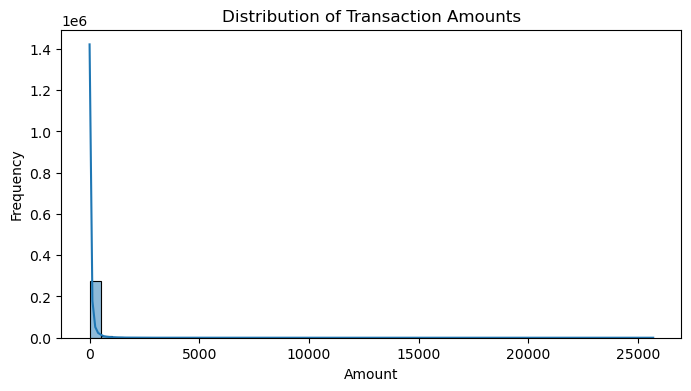

In [16]:
# Plot histogram of the 'Amount' feature
plt.figure(figsize=(8, 4))
sns.histplot(credit_df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

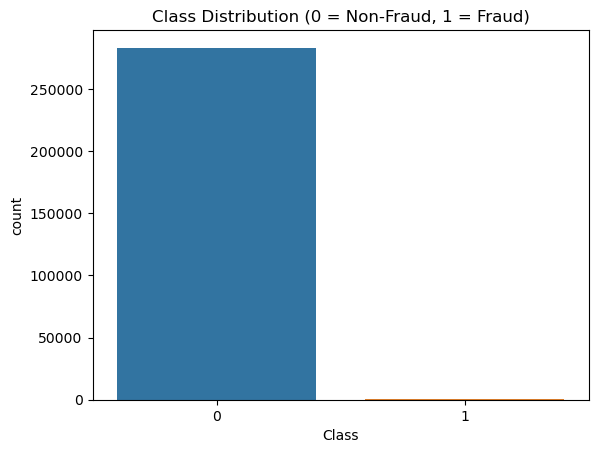

In [17]:
# Count of fraud (1) and non-fraud (0)
sns.countplot(x='Class', data=credit_df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

## Bivariate analysis <a class="anchor" id="Univar"></a>

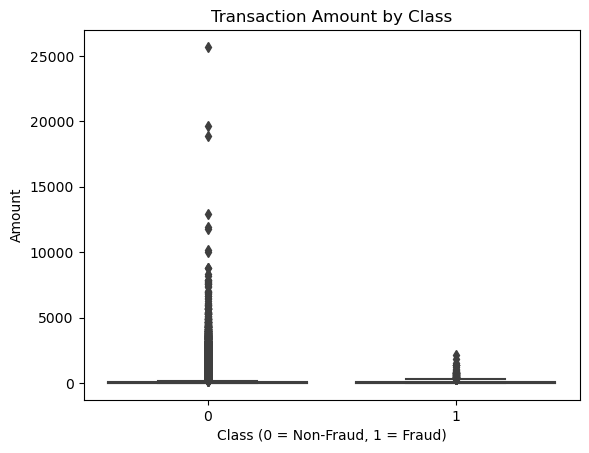

In [18]:
# Boxplot to compare transaction amounts between fraud and non-fraud
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title("Transaction Amount by Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Amount")
plt.show()

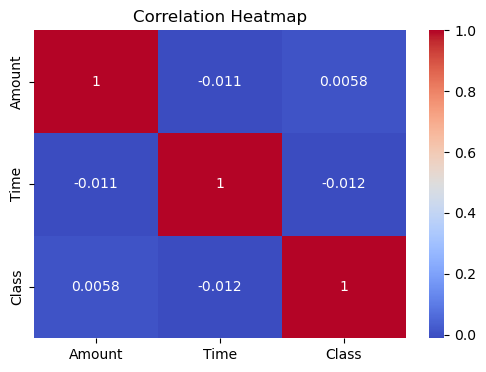

In [19]:
# Calculate the correlation between 'Amount', 'Time', and 'Class' columns
selected_columns = ['Amount', 'Time', 'Class']
correlation_matrix = credit_df[selected_columns].corr()

# Set up the size of the plot
plt.figure(figsize=(6, 4))

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

## Multivariate analysis <a class="anchor" id="Univar"></a>

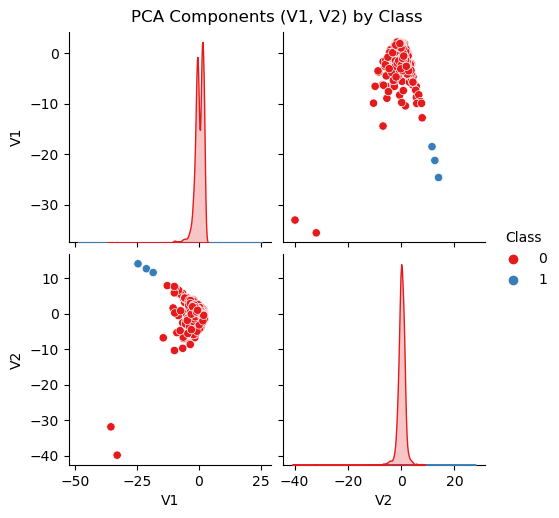

In [20]:
# Take a random sample of 2,000 rows from the dataset to improve performance
sample_df = credit_df.sample(n=2000, random_state=1)

# Create a pairplot to visualize the relationship between PCA features V1 and V2, colored by 'Class'
sns.pairplot(
    data=sample_df,
    vars=['V1', 'V2'],
    hue='Class',
    palette='Set1'
)

# Add a title above the plot
plt.suptitle("PCA Components (V1, V2) by Class", y=1.02)

# Show the plot
plt.show()

In [21]:
# Calculate the average 'Amount' and 'Time' for each class (0: non-fraud, 1: fraud)
grouped_means = credit_df.groupby('Class')[['Amount', 'Time']].mean()

# Print the results
print(grouped_means)

           Amount          Time
Class                          
0       88.413575  94835.058093
1      123.871860  80450.513742


In [22]:
# Check how many transactions are fraudulent versus not fraudulent
print("\nNumber of transactions by class (0 = Not Fraud, 1 = Fraud):")
fraud_counts = credit_df['Class'].value_counts()
print(fraud_counts)


Number of transactions by class (0 = Not Fraud, 1 = Fraud):
0    283253
1       473
Name: Class, dtype: int64


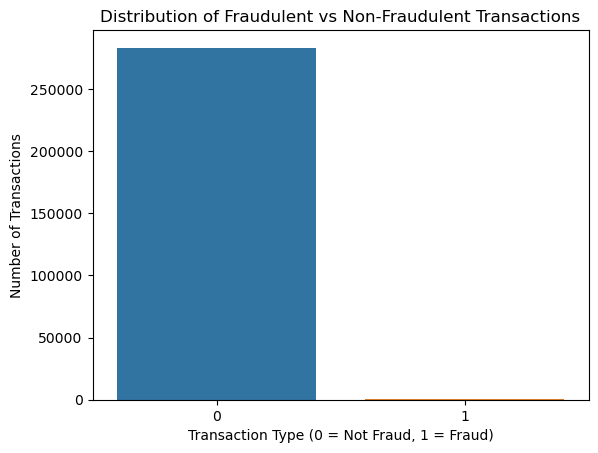

In [23]:
# Create a bar chart to visualize how many transactions are fraudulent vs non-fraudulent
sns.countplot(x='Class', data=credit_df)

# Add a title and axis labels to make the chart easier to understand
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Transaction Type (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")

# Display the chart
plt.show()

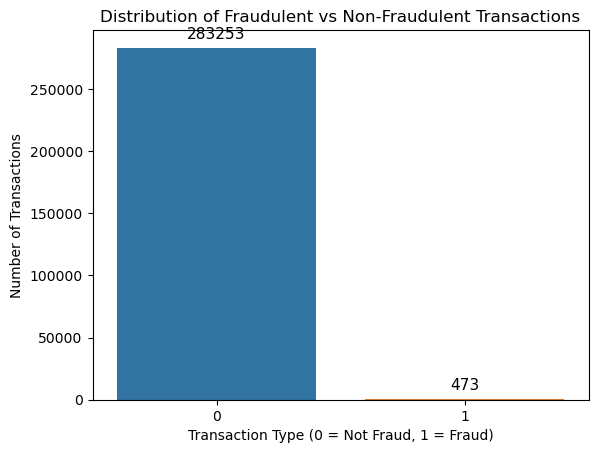

In [24]:
# Create a bar chart to display the distribution of fraud vs non-fraud transactions
ax = sns.countplot(x='Class', data=credit_df)

# Loop through each bar in the chart and add annotations with the exact values
for bar in ax.patches:
    height = bar.get_height()  # Get the height (value) of the bar
    # Annotate the bar with its value at the center of the bar
    ax.annotate(
        f'{height}',  # The value to display
        (bar.get_x() + bar.get_width() / 2., height),  # Position the text in the center of the bar
        ha='center',  # Align horizontally
        va='center',  # Align vertically
        fontsize=11,  # Set the font size
        color='black',  # Set the font color
        xytext=(0, 10),  # Adjust the position slightly upwards
        textcoords='offset points'  # Use offset points for the annotation position
    )

# Set the title and axis labels for the chart
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")  # Title of the chart
plt.xlabel("Transaction Type (0 = Not Fraud, 1 = Fraud)")  # X-axis label
plt.ylabel("Number of Transactions")  # Y-axis label

# Display the chart
plt.show()

##  Model Building <a class="anchor" id="model-building"></a>
I selected Logistic Regression for its simplicity and interpretability. The model was trained on the scaled features from the training set using 1000 maximum iterations for convergence.

In [25]:
# 'Class' is the target variable we want to predict (fraud or not fraud)
# We will separate the features (input data) and the target (output label)

# Features: All columns except 'Class' are considered the input data for prediction
X = credit_df.drop('Class', axis=1)

# Target: 'Class' is the output we want to predict (fraud or not fraud)
y = credit_df['Class']

In [26]:
# I want to ensure that all features are on the same scale for better performance of the model
# To do this, we'll use StandardScaler, which standardizes the features to have a mean of 0 and a standard deviation of 1

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the features, transforming them to a standardized scale
X_scaled = scaler.fit_transform(X)

## Model Training <a class="anchor" id="model-training"></a>

In [27]:
# Split the dataset into training and testing sets
# 70% of the data will be used for training, and 30% for testing
# We'll use stratified sampling to maintain the same proportion of fraud and non-fraud transactions in both sets

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # The standardized features
    y,         # The target variable (fraud or not fraud)
    test_size=0.3,  # 30% of the data will be used for testing
    random_state=42,  # Set a random seed for reproducibility
    stratify=y  # Ensure that both training and test sets have a similar distribution of fraud and non-fraud cases
)

In [28]:
# I'll start by using a simple Logistic Regression model as a baseline for our predictions
# Logistic Regression is a good starting point for binary classification tasks (fraud or not fraud)

# Create an instance of the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Allowing up to 1000 iterations for the model to converge

# Train the model using the training data (X_train for features and y_train for labels)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
# Now, I'll use the trained model to make predictions on the test data
# This allows us to evaluate how well the model performs on unseen data

# Use the model to predict the target values (fraud or not fraud) for the test features (X_test)
y_pred = model.predict(X_test)

 ## Model Evaluation <a class="anchor" id="model-evaluation"></a>
The model was evaluated using multiple metrics:

- **Classification Report** showed precision and recall scores
- **Confusion Matrix** revealed true/false positives and negatives
- **ROC-AUC Score**: 0.97, showing excellent separation ability

The ROC Curve confirmed the model’s strength at detecting frauds with minimal false alarms.


In [30]:
# Now, let's evaluate how well our model is performing
# We'll print a classification report, which gives us detailed metrics like precision, recall, and F1-score

print("\nClassification Report:")
# Compare the predicted labels (y_pred) with the actual labels (y_test) to generate the classification report
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118



 ## Results and Interpretation <a class="anchor" id="results-and-interpretation"></a>
The model performed well despite the extreme class imbalance:
- Most fraudulent transactions were correctly flagged
- Some false positives occurred, which is acceptable in fraud scenarios where precision is less critical than recall


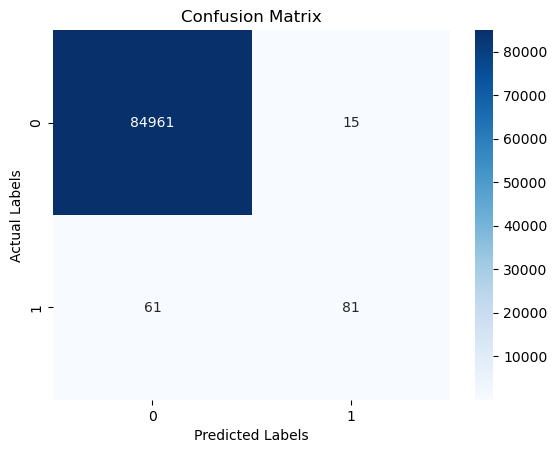

In [31]:
# Let's plot a confusion matrix to better understand how well our model is performing
# The confusion matrix shows how many frauds and non-frauds were correctly or incorrectly predicted by the model

# Generate the confusion matrix by comparing the actual labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Use a heatmap to visualize the confusion matrix
# Annotate the heatmap with the actual counts, and format the numbers as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add a title and labels to make the plot easier to understand
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")  # Label for the predicted class
plt.ylabel("Actual Labels")    # Label for the actual class

# Display the heatmap
plt.show()

In [32]:
# Let's calculate the ROC-AUC score to evaluate how well the model distinguishes between fraud and non-fraud transactions
# The ROC-AUC score tells us the model's ability to correctly classify fraud and non-fraud transactions.

# Get the predicted probabilities for the positive class (fraud)
# We use `predict_proba` to get the probabilities for both classes, and select the probabilities for the fraud class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score by comparing the actual labels (y_test) with the predicted probabilities for fraud (y_prob)
roc_score = roc_auc_score(y_test, y_prob)

# Print the ROC-AUC score to show how well the model is performing
print(f"\nROC-AUC Score: {roc_score:.2f}")


ROC-AUC Score: 0.97


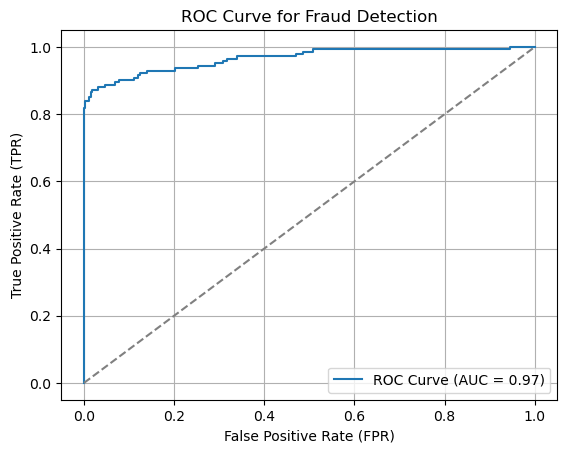

In [33]:
# Let's plot the ROC curve to visually understand the trade-off between the true positive rate (TPR) and false positive rate (FPR)
# The ROC curve helps us evaluate how well the model distinguishes between fraud and non-fraud transactions.

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Create a new figure for the plot
plt.figure()

# Plot the ROC curve: The x-axis represents the FPR, and the y-axis represents the TPR
# We also display the AUC score in the label for context
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_score:.2f})")

# Add a reference line (diagonal line) to show random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line representing random classifier

# Set the labels for the x and y axes
plt.xlabel("False Positive Rate (FPR)")  # The rate at which non-fraud is misclassified as fraud
plt.ylabel("True Positive Rate (TPR)")  # The rate at which fraud is correctly identified

# Set the title of the plot
plt.title("ROC Curve for Fraud Detection")

# Add a legend to the plot to explain the line
plt.legend()

# Enable the grid for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()

## Save the Model<a class="anchor" id="save-the-model"></a>

In [34]:
# Save the trained model to a file named 'fraud_model.pkl'
joblib.dump(model, 'fraud_model.pkl')

# Confirm that the model was saved
print("✅ The model has been successfully saved as 'fraud_model.pkl'")

✅ The model has been successfully saved as 'fraud_model.pkl'


In [35]:
# Load the model from the saved file
loaded_model = joblib.load('fraud_model.pkl')

# Use it just like before
predictions = loaded_model.predict(X_test)

In [36]:
# Load the model from file
model = joblib.load('fraud_model.pkl')

## Model Output<a class="anchor" id="model-output"></a>
I created a DataFrame `df3` to store and review the predicted results:
```python
df2 = pd.DataFrame(predictions, columns=['predicted'])
print(df3.head())
```
This allowed us to view predictions in a clean, tabular format.


In [37]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
# Predict fraud class (0 or 1) using the test set
predictions = model.predict(X_test)

In [39]:
# Wrap predictions into a nice, readable DataFrame with column name 'predit'
df3 = pd.DataFrame(predictions, columns=['predicted'])

# Show the result
print(df3.head())


   predicted
0          0
1          0
2          0
3          0
4          0


In [40]:
# Save the dataset to a CSV file
credit_df.to_csv('credit_data.csv', index=False)

In [41]:
# Save the dataset with predictions to a CSV file
credit_df.to_csv('credit_data_with_predictions.csv', index=False)


## Conclusion and Next Steps<a class="anchor" id="conclusion-and-next-steps"></a>
**Key Takeaways:**
- Logistic Regression is a strong baseline for fraud detection
- Feature scaling and class stratification are essential steps
- Evaluation shows high potential for real-world deployment

**Next Steps:**
- Try advanced models like Random Forest or XGBoost
- Apply SMOTE to handle class imbalance
- Build a dashboard or real-time alert system



 ## Appendices<a class="anchor" id="appendices"></a>
- Full source code and visuals (confusion matrix, ROC curve)
- `fraud_model.pkl` saved using `joblib`
- Data source: [Kaggle Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)
